In [1]:
import pandas as pd
import numpy as np
import h2o

from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA  # Principal component
from sklearn.linear_model import LinearRegression
from h2o.automl import H2OAutoML as ml

from functions.datacleaning import MoscowHousing as mh
from functions.distance import get_distance_coordinates, norm_features

import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

# Prepare NaN Values

In [2]:
# Get data
data = mh(
          coordinates=None,
          data_train="../prepared_data/train_prepared.csv",
          data_test="../prepared_data/test_prepared.csv",
          need_correction=False,
          normalize = False,
          features_float = ["area_total", 
                            "distance", 
                            "area_kitchen", 
                            "area_living", 
                            "ceiling",
                            "distance_metro"]
          )

In [3]:
XTrain, YTrain = data.get_data_train()
XTest = data.get_data_test()

In [4]:
XTrain.head()

,building_id,id,seller,price,area_total,price_per_square_meter,area_kitchen,area_living,floor,rooms,...,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating,distance,distance_metro
0,0,18450,NaN,11300000.0,-0.011096,153116.531165,-0.541037,0.263027,1,3,...,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,10.252880,286.45
1,1,20065,1.0,7100000.0,-0.553098,169047.619048,-0.388730,-0.596888,5,1,...,2.0,17,0.0,1.0,1.0,1.0,1.0,0.0,36.091930,16183.78
2,2,2137,0.0,13600000.0,0.009357,181333.333333,-0.388730,0.517816,3,3,...,3.0,12,0.0,1.0,0.0,1.0,1.0,0.0,12.374064,956.44
3,3,4155,1.0,10100000.0,-0.263348,171186.440678,NaN,NaN,2,2,...,2.0,7,0.0,1.0,1.0,NaN,NaN,0.0,15.232969,1405.21
4,3,8798,1.0,10100000.0,-0.263348,171186.440678,-0.084116,-0.262477,2,2,...,2.0,7,0.0,1.0,1.0,NaN,NaN,0.0,15.232969,1405.21


In [5]:
YTrain.head()

0    11300000.0
1     7100000.0
2    13600000.0
3    10100000.0
4    10100000.0
Name: price, dtype: float64

In [6]:
XTest.head()

,building_id,id,seller,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,...,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating,distance,distance_metro
0,4,26052,NaN,5.675295,NaN,NaN,3,6,NaN,NaN,...,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,22.208129,4981.58
1,5,29404,1.0,-0.896821,-1.581108,-0.588336,1,1,NaN,-0.077026,...,3.0,12,0.0,1.0,0.0,NaN,1.0,NaN,16.744106,499.31
2,6,24089,2.0,0.494253,-0.417982,0.678815,3,4,1.0,-0.068230,...,3.0,22,0.0,1.0,1.0,1.0,1.0,0.0,11.886858,1123.52
3,11,24033,0.0,0.087932,0.163582,0.165921,11,3,NaN,NaN,...,3.0,17,0.0,1.0,1.0,NaN,1.0,0.0,15.455810,955.56
4,11,32976,1.0,0.096804,-0.316208,0.368062,5,3,1.0,NaN,...,3.0,17,0.0,1.0,1.0,NaN,1.0,0.0,15.455810,955.56


In [7]:
X_Train = XTrain.copy()
Y_Train = YTrain.copy()
X_Test = XTest.copy()

In [8]:
X = X_Train.copy()
y = Y_Train.copy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Template for replacing nan by computing other variables
#df["parking"] = df.groupby("district").transform(lambda x: x.fillna(x.median()))["parking"]

In [11]:
#df.column_name.loc[df.column_name > max_value]  = max_value

In [12]:
district_counts = {0:{},1:{},2:{},3:{},4:{},5:{},6:{},7:{},8:{},9:{},10:{},11:{},12:{}}
districts = XTrain["district"]
for d in districts:
    pass

In [13]:
pca_model = PCA(n_components=4)

In [14]:
features = ["area_total", 
            "distance",
            "floor",
            "rooms",
            "distance_metro"]

In [15]:
df = X_train[features].copy()
df.head()

,area_total,distance,floor,rooms,distance_metro
18332,0.313424,8.208811,8,1,443.98
18707,1.096770,4.478152,12,4,245.14
21356,1.713766,9.523097,22,4,1275.69
19907,2.992072,7.921606,7,5,1222.75
15697,-0.195172,12.115769,5,3,154.12


In [16]:
df.isnull().sum()

area_total        0
distance          0
floor             0
rooms             0
distance_metro    0
dtype: int64

In [17]:
pca_train = pca_model.fit_transform(X_train[features])

In [18]:
pca_train_Df = pd.DataFrame(data = pca_train
             , columns = ['principal 1', 'principal 2', 'principal 3', 'principal 4'])

In [19]:
print('Explained variation per principal component: {}'.format(pca_model.explained_variance_ratio_))

Explained variation per principal component: [9.99991932e-01 5.51468176e-06 2.40243951e-06 1.25520922e-07]


In [20]:
pca_train_Df.head()

,principal 1,principal 2,principal 3,principal 4
0,-1218.903336,-1.166329,2.612224,-0.908778
1,-1417.750036,2.952936,6.055901,1.556766
2,-387.195264,13.054601,2.372077,2.025666
3,-440.134795,-1.853061,4.530409,3.793285
4,-1508.756009,-4.361858,-1.573557,0.662503


In [21]:
# Set up a regression model
reg_model = LinearRegression()

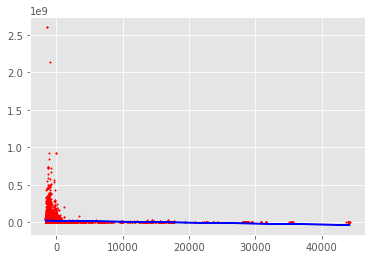

In [25]:
# Train the model
reg_model.fit(pca_train_Df["principal 1"].values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Test the model
y_pred = reg_model.predict(pca_train_Df["principal 1"].values.reshape(-1, 1))
plt.scatter(pca_train_Df["principal 1"], y_train, s=2, color = 'red')
plt.plot(pca_train_Df["principal 1"], reg_model.predict(pca_train_Df["principal 1"].values.reshape(-1, 1)), color = 'blue')